In [22]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
churn = pd.read_csv(r"C:\Users\visha\OneDrive\Scaler Academy\Datasets\churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [7]:
churn.shape

(5700, 21)

In [3]:
# Inspect the target variable , check the counts of 0 and 1 
churn.Churn.value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

> if the value is greater then then it has high multicollinearity. one means 2 varible is fully correlated. 
here it is difficult to check which variable has high correlation. we can use the heat map to visulaize it easily

In [4]:
# Check input variables correlation
# Any signs of multicollinearity
churn.corr()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code,Churn
Account Length,1.000000,0.011789,0.004564,-0.002186,-0.044533,0.011056,0.008875,0.036037,0.018248,0.032344,0.004566,0.043553,-0.002178,-0.009046,-0.044525,0.022312,0.011036,-0.053540,0.015886
VMail Message,0.011789,1.000000,-0.104007,-0.033322,-0.030805,0.019169,0.012681,0.045794,0.961267,-0.004139,-0.104004,0.003754,-0.033291,0.008852,-0.030863,0.043756,0.019177,0.013022,-0.135798
Day Mins,0.004564,-0.104007,1.000000,0.139616,0.068947,0.006526,-0.189754,0.003526,-0.107875,0.033672,1.000000,0.015095,0.139588,0.051255,0.068926,0.037390,0.006770,-0.027064,0.252872
Eve Mins,-0.002186,-0.033322,0.139616,1.000000,-0.002052,0.003427,-0.091823,0.029898,-0.027109,0.017075,0.139618,0.011644,1.000000,0.043977,-0.002114,-0.015453,0.003376,0.005082,0.124518
Night Mins,-0.044533,-0.030805,0.068947,-0.002052,1.000000,-0.029546,-0.046834,-0.077787,-0.034514,0.016829,0.068944,-0.011866,-0.002053,0.003351,0.999999,-0.004103,-0.029493,-0.001191,0.055394
Intl Mins,0.011056,0.019169,0.006526,0.003427,-0.029546,1.000000,-0.036683,0.158024,0.020768,0.011332,0.006524,-0.007976,0.003414,0.033223,-0.029574,0.037316,0.999993,-0.015421,0.088293
CustServ Calls,0.008875,0.012681,-0.189754,-0.091823,-0.046834,-0.036683,1.000000,-0.065908,0.008368,-0.006075,-0.189754,0.003466,-0.091831,-0.023973,-0.046838,-0.034975,-0.036798,0.012072,0.251015
Intl Plan,0.036037,0.045794,0.003526,0.029898,-0.077787,0.158024,-0.065908,1.000000,0.054449,-0.047392,0.003527,-0.016155,0.029915,0.017933,-0.077805,-0.044742,0.157794,0.050064,0.291062
VMail Plan,0.018248,0.961267,-0.107875,-0.027109,-0.034514,0.020768,0.008368,0.054449,1.000000,-0.004035,-0.107872,0.005710,-0.027085,0.021642,-0.034566,0.043064,0.020793,0.004742,-0.152296
Day Calls,0.032344,-0.004139,0.033672,0.017075,0.016829,0.011332,-0.006075,-0.047392,-0.004035,1.000000,0.033667,0.011825,0.017072,-0.020394,0.016806,0.023909,0.011476,-0.000091,0.014876


<AxesSubplot:>

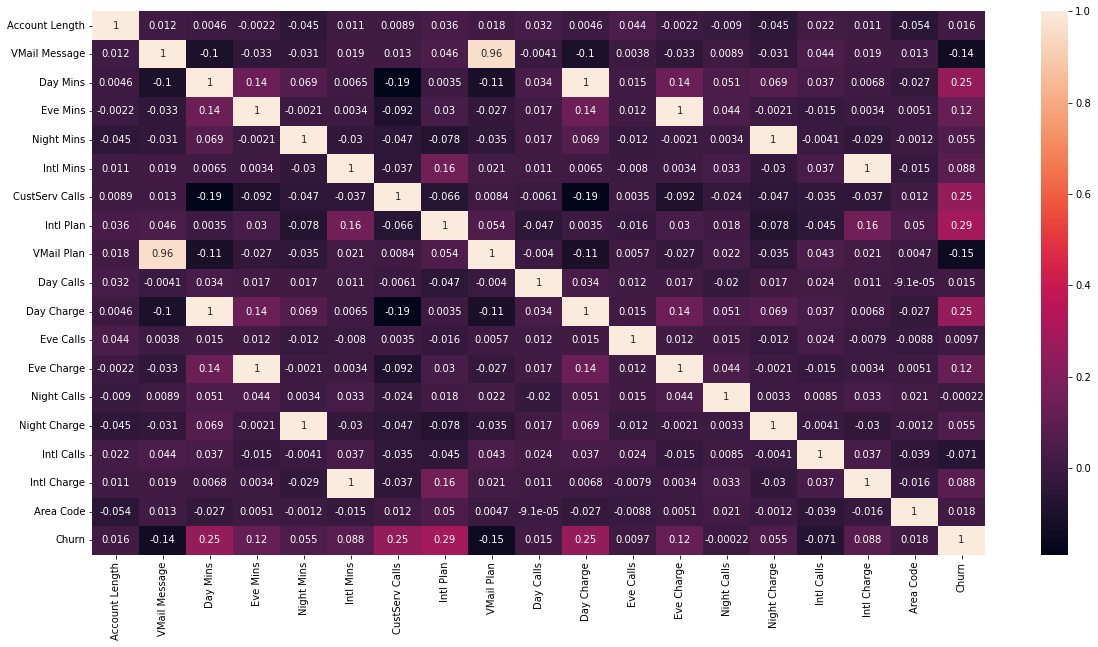

In [6]:
# Difficult to judge from correlation matrix, lets use heatmap 
plt.figure(figsize = (20,10))
sns.heatmap(churn.corr(),annot = True)

> by looking to the heatmap, we can clearly see following variables are correlated.<br>
(VMail Plan --> Vmail Message)<br> 
(Day Charge --> Day Mins)<br> 
(Eve Charge --> Eve Mins)<br>
(Night Charge --> Night Mins)<br> 
(Inti Charge --> Inti Charge)<br>
(VMail Message --> VMail Plan)<br>
(Day Min --> Day Charge)<br>
(Eve Mins --> Eve Charge)<br>
(Night Mins --> Night Charge)<br> 
(Inti Mins --> Inti Charge)

In [9]:
#Some variables are object datatypes , State, Phone 
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  5700 non-null   int64  
 1   VMail Message   5700 non-null   int64  
 2   Day Mins        5700 non-null   float64
 3   Eve Mins        5700 non-null   float64
 4   Night Mins      5700 non-null   float64
 5   Intl Mins       5700 non-null   float64
 6   CustServ Calls  5700 non-null   int64  
 7   Intl Plan       5700 non-null   int64  
 8   VMail Plan      5700 non-null   int64  
 9   Day Calls       5700 non-null   int64  
 10  Day Charge      5700 non-null   float64
 11  Eve Calls       5700 non-null   int64  
 12  Eve Charge      5700 non-null   float64
 13  Night Calls     5700 non-null   int64  
 14  Night Charge    5700 non-null   float64
 15  Intl Calls      5700 non-null   int64  
 16  Intl Charge     5700 non-null   float64
 17  State           5700 non-null   o

In [10]:
# Drop the columns State, Area code and Phone , they are not useful in prediction 
churn = churn.drop(['State', 'Area Code', 'Phone'], axis = 1)

In [11]:
# The final set of variables we are going to use 
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73,0


In [13]:
## Data Preparation , Standardiation, MinMax scaling 
# Here we are using Min Max scaling 
mm = MinMaxScaler()

In [8]:
# After through inspection these variables seems to be good input variables. 
# lets keep these variables for future model building 
#cols = ['Day Mins', 'Eve Mins', 'CustServ Calls', 'Intl Plan','VMail Message']

In [19]:
cols = churn.columns
churn[cols] = mm.fit_transform(churn[cols])

In [16]:
## Verify scaled data 
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Churn
0,0.524793,0.490196,0.755701,0.542755,0.595750,0.500,0.111111,0.0,1.0,0.666667,0.755701,0.582353,0.542866,0.408451,0.595935,0.15,0.500000,0.0
1,0.438017,0.509804,0.460661,0.537531,0.621840,0.685,0.111111,0.0,1.0,0.745455,0.460597,0.605882,0.537690,0.492958,0.622236,0.15,0.685185,0.0
2,0.561983,0.000000,0.693843,0.333242,0.374933,0.610,0.000000,0.0,0.0,0.690909,0.693830,0.647059,0.333225,0.500000,0.375374,0.25,0.609259,0.0
3,0.342975,0.000000,0.853478,0.170195,0.467187,0.330,0.222222,1.0,0.0,0.430303,0.853454,0.517647,0.170171,0.394366,0.467424,0.35,0.329630,0.0
4,0.305785,0.000000,0.475200,0.407754,0.440290,0.505,0.333333,1.0,0.0,0.684848,0.475184,0.717647,0.407959,0.619718,0.440526,0.15,0.505556,0.0


In [20]:
#split into train and test
target = churn["Churn"]
X = churn.drop(['Churn'], axis = 1)

In [21]:
## Create tarin and test splits 
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state= 1)

In [24]:
## Build the basic Logistic regression, with default features 
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Check train accuracy score 
lr.score(X_train, y_train)

0.7684210526315789

In [30]:
# Check Test accuracy Score
lr.score(X_test, y_test)

0.7614035087719299

In [26]:
lr.intercept_

array([-6.42601285])

In [27]:
lr.coef_

array([[ 0.19129855,  1.11340251,  2.17567855,  1.03934503,  0.65371075,
         0.62580339,  5.16686034,  2.38340426, -1.48921218,  0.51493878,
         2.17474924,  0.30983122,  1.03682431, -0.0357902 ,  0.65566846,
        -0.98744127,  0.63221825]])

In [28]:
## make predictions 
y_hat = lr.predict(X_test)

In [31]:
y_hat

array([1., 0., 0., ..., 0., 1., 0.])

In [33]:
lr.predict_proba(X_test)

array([[0.23420539, 0.76579461],
       [0.59388722, 0.40611278],
       [0.85174739, 0.14825261],
       ...,
       [0.62274691, 0.37725309],
       [0.2327295 , 0.7672705 ],
       [0.81533006, 0.18466994]])